### LAB1: NN1: Bazowa implementacja

Na tych zajęciach należy zaimplementować sieć neuronową typu MLP, w której można ustawić: liczbę warstw, liczbę neuronów w każdej z warstw i wagi poszczególnych połączeń, w tym biasów. Sieć ma używać sigmoidalnej funkcji aktywacji. Na wyjściu dopuszczana jest funkcja liniowa.

Implementacja sieci musi być przygotowana w taki sposób, żeby łatwo zmieniać:
 * Architekturę, to znaczy liczbę wejść, wyjść, neuronów w warstwach ukrytych.
 * Funkcję aktywacji.
 
Tak przygotowaną implementację należy następnie wykorzystać do rozwiązania zadania regresji na dostarczonych danych. Parametry sieci należy dobrać ręcznie, tak aby uzyskać możliwie dobrze wyniki na zbiorach danych (zbudować po jednej sieci dla każdego zbioru):

* square-simple
* steps-large


Rozważyć architektury sieci:
* jedna warstwa ukryta, 5 neuronów,
* jedna warstwa ukryta, 10 neuronów,
* dwie warstwy ukryte, po 5 neuronów każda.

Aby otrzymać 2 punkty MSE na nieznormalizowanym zbiorze testowym nie może przekraczać wartości 9.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.special import expit

## Funkcja aktywacji

In [2]:
def sigmoid(x):
    return np.where(x >= 0, 
                    1 / (1+np.exp(-x)), 
                    np.exp(x) / (1+np.exp(x))
                   )
def sigmoid2(x): #stablina numerycznie
    return expit(x)

## Implementacja sieci MLP

In [3]:
def MLP(X, no_neutrons, weights, bias, activation_func):
    #no_neutrons - ustawia ile jest wag w każdej z warstw (z wejściową i wyjściową włącznie)
    # i tym samym determinuje ile jest warstw ukrytych
    z = X
    for i in range(len(no_neutrons)-2): #-2 bo nie uzględamiamy tu wejściowej i wyjściowej warstwy
        z = np.dot(z, weights[i]) + bias[i]
        z = activation_func(z)
        #print(i)
        #print(z)
    z = np.dot(z, weights[-1]) + bias[-1] # na końcu nie ma funkcji sigmoidalnej więc już poza pętlą
    #print('s')
    #print(z)
    return z #na wyjściu funkcja liniowa

### Pierwszy zbiór danych (*square simple*)

In [4]:
data_train = pd.read_csv('../../data/regression/square-simple-training.csv', index_col = 0)
data_test = pd.read_csv('../../data/regression/square-simple-test.csv', index_col = 0)

In [5]:
x = data_train[['x']]
y = data_train[['y']]
x_test = data_test[['x']]
y_test = data_test[['y']]

#### Architektura: jedna warstwa ukryta, 5 neuronów

In [6]:
no_neutrons = [1, 5, 1] #ile jest neutrownów w każdej z wartw, wliczając wejściową i wyjściową
w0 = np.array([[0.966, -0.966, -0.966, -0.966, -0.966]]) # rozmiar n_0 x n_1 czyli 1x5
b0 = np.array([[-2.88, -2.88, -2.88, -2.88, -2.88]]) # 1x5 bo 5 neuronów w pierwszej warstwie ukrytej
w1 = np.array([[2000], [500], [500], [500], [500]]) # rozmiar n_1 x n_2-wyjściowej czyli 5x1
b1 = np.array([[-340]]) #1x1 bo tyle netronów 2 drugiej-ostatniej warstwie
weights = [w0, w1]
bias = [b0, b1]

In [7]:
y_pred_train = MLP(x, no_neutrons, weights, bias, sigmoid)
mean_squared_error(y, y_pred_train)

2.530489209890172

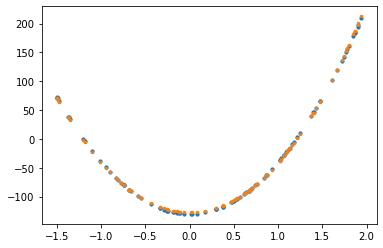

In [8]:
plt.scatter(x, y, s=10)
plt.scatter(x, y_pred_train, s=6)
plt.show()

In [9]:
y_pred_test = MLP(x_test, no_neutrons, weights, bias, sigmoid)
mean_squared_error(y_test, y_pred_test)

2.6240009187397995

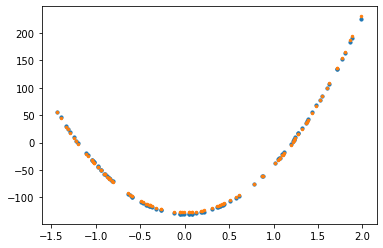

In [10]:
plt.scatter(x_test, y_test, s=10)
plt.scatter(x_test, y_pred_test, s=6)
plt.show()

Dla zbioru *square simple* i architektury z jedną warstwą ukrytą z 5 neutronami:
 * MSE dla zbioru treningowego: 2.530
 * MSE dla zbioru testowego: 2.624

#### Architektura: jedna warstwa ukryta, 10 neuronów

In [11]:
no_neutrons = [1, 10, 1] #ile jest neutrownów w każdej z wartw, wliczając wejściową i wyjściową
w0 = np.array([[0.966, -0.966, -0.966, -0.966, -0.966, -0.966, 0.966, 0.966, 0.966, 0.966]]) # rozmiar n_0 x n_1 czyli 1x10
b0 = np.array([[-2.88, -2.88, -2.88, -2.88, -2.88, -2.88, -2.88, -2.88, -2.88, -2.88]]) # 1x10 bo 10 neuronów w pierwszej warstwie ukrytej
w1 = np.array([[400], [400], [400], [400], [400], [400], [400], [400], [400], [400]]) # rozmiar n_1 x n_2-wyjściowej czyli 10x1
b1 = np.array([[-340]]) #1x1 bo tyle netronów 2 drugiej-ostatniej warstwie
weights = [w0, w1]
bias = [b0, b1]

In [12]:
y_pred_train = MLP(x, no_neutrons, weights, bias, sigmoid)
mean_squared_error(y, y_pred_train)

2.5304892098901854

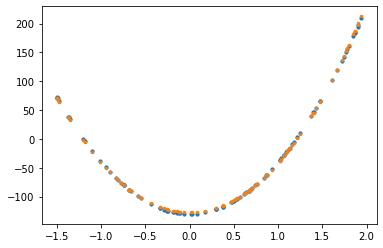

In [13]:
plt.scatter(x, y, s=10)
plt.scatter(x, y_pred_train, s=6)
plt.show()

In [14]:
y_pred_test = MLP(x_test, no_neutrons, weights, bias, sigmoid)
mean_squared_error(y_test, y_pred_test)

2.6240009187398114

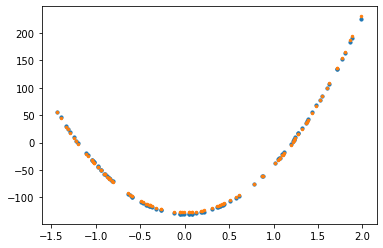

In [15]:
plt.scatter(x_test, y_test, s=10)
plt.scatter(x_test, y_pred_test, s=6)
plt.show()

Dla zbioru *square simple* i architektury z jedną warstwą ukrytą z 10 neutronami:
 * MSE dla zbioru treningowego: 2.530
 * MSE dla zbioru testowego: 2.624
 
czyli dokładnie tak samo jak dla pierwszej architektury

#### Architektura: dwie warstwy ukryte, po 5 neuronów każda

In [16]:
no_neutrons = [1, 5, 5, 1] #ile jest neutronów w każdej z wartw, wliczając wejściową i wyjściową
w0 = np.array([[0.965, -2.217, -0.965, 1, -1]]) # rozmiar n_0 x n_1 czyli 1x5
b0 = np.array([[-2.88, -2.9, -2.88, -2.88, -2.88]]) # 1x5 bo 5 neuronów w pierwszej warstwie ukrytej
w1 = np.array([[3.1, 0, 0, 0, 0],
               [0, 3.2, 0, 0, 0],
               [0, 0, 3.2, 0, 0],
               [0, 0, 0, 3.1, 0],
               [0, 0, 0, 0, 3.1]]) # rozmiar n_1 x n_2-wyjściowej czyli 5x5
b1 = np.array([[0, 0, 0, 0, 0]]) # 1x5 bo 5 neuronów w drugiej warstwie ukrytej
w2 = np.array([[2000], [500], [500], [500], [500]]) # rozmiar n_1 x n_2-wyjściowej czyli 5x1
b2 = np.array([[-2300]]) #1x1 bo tyle netronów 2 drugiej-ostatniej warstwie
weights = [w0, w1, w2]
bias = [b0, b1, b2]

In [17]:
y_pred_train = MLP(x, no_neutrons, weights, bias, sigmoid)
mean_squared_error(y, y_pred_train)

22.782538484294545

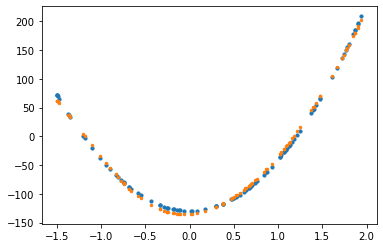

In [18]:
plt.scatter(x, y, s=10)
plt.scatter(x, y_pred_train, s=6)
plt.show()

In [19]:
y_pred_test = MLP(x_test, no_neutrons, weights, bias, sigmoid2)
mean_squared_error(y_test, y_pred_test)

19.885175176807635

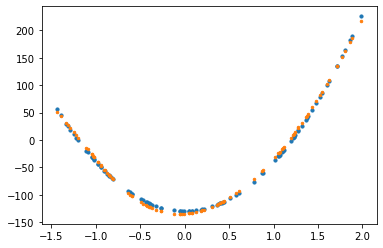

In [20]:
plt.scatter(x_test, y_test, s=10)
plt.scatter(x_test, y_pred_test, s=6)
plt.show()

Dla zbioru *square simple* i architektury z dwiema warstwami ukrytymi, po 5 neuronów każda:
 * MSE dla zbioru treningowego: 22.793
 * MSE dla zbioru testowego: 19.885

### Drugi zbiór danych (*steps large*)

In [21]:
data_train = pd.read_csv('../../data/regression/steps-large-training.csv', index_col = 0)
data_test = pd.read_csv('../../data/regression/steps-large-test.csv', index_col = 0)

In [22]:
x = data_train[['x']]
y = data_train[['y']]
x_test = data_test[['x']]
y_test = data_test[['y']]

#### Architektura: jedna warstwa ukryta, 5 neuronów

In [23]:
no_neutrons = [1, 5, 1] #ile jest neutrownów w każdej z wartw, wliczając wejściową i wyjściową
w0 = np.array([[500, 500, 500, 500, 500]]) # rozmiar n_0 x n_1 czyli 1x5
b0 = np.array([[-250, -750, 250, 250, 250]]) # 1x5 bo 5 neuronów w pierwszej warstwie ukrytej
w1 = np.array([[80], [80], [80], [0], [0]]) # rozmiar n_1 x n_2-wyjściowej czyli 5x1
b1 = np.array([[-80]]) #1x1 bo tyle netronów 2 drugiej-ostatniej warstwie
weights = [w0, w1]
bias = [b0, b1]

In [24]:
y_pred_train = MLP(x, no_neutrons, weights, bias, sigmoid2)
mean_squared_error(y, y_pred_train)

4.190735668232934

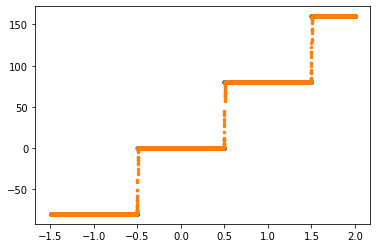

In [25]:
plt.scatter(x, y, s=10)
plt.scatter(x, y_pred_train, s=6)
plt.show()

In [26]:
y_pred_test = MLP(x_test, no_neutrons, weights, bias, sigmoid2)
mean_squared_error(y_test, y_pred_test)

4.655249551651936

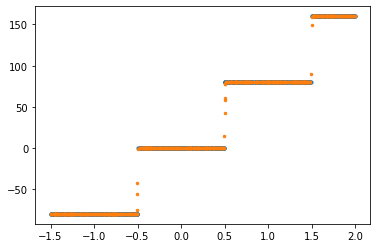

In [27]:
plt.scatter(x_test, y_test, s=10)
plt.scatter(x_test, y_pred_test, s=6)
plt.show()

Dla zbioru *steps large* i i architektury z jedną warstwą ukrytą z 5 neutronami:
 * MSE dla zbioru treningowego: 4.191
 * MSE dla zbioru testowego: 4.655

#### Architektura: jedna warstwa ukryta, 10 neuronów

In [28]:
no_neutrons = [1, 10, 1] #ile jest neutrownów w każdej z wartw, wliczając wejściową i wyjściową
w0 = np.array([[500, 500, 500, 500, 500, 500, 500, 500, 500, 500]]) # rozmiar n_0 x n_1 czyli 1x10
b0 = np.array([[-250, -750, 250, 250, 250, 250, 250, 250, 250, 250]]) # 1x10 bo 10 neuronów w pierwszej warstwie ukrytej
w1 = np.array([[80], [80], [80], [80], [-480], [80], [80], [80], [80], [80]]) # rozmiar n_1 x n_2-wyjściowej czyli 10x1
b1 = np.array([[-80]]) #1x1 bo tyle netronów 2 drugiej-ostatniej warstwie
weights = [w0, w1]
bias = [b0, b1]

In [29]:
y_pred_train = MLP(x, no_neutrons, weights, bias, sigmoid2)
mean_squared_error(y, y_pred_train)

4.190735668232937

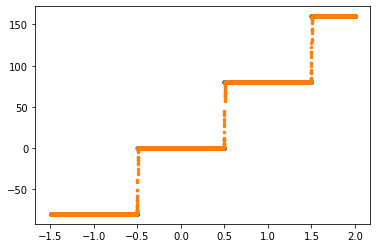

In [30]:
plt.scatter(x, y, s=10)
plt.scatter(x, y_pred_train, s=6)
plt.show()

In [31]:
y_pred_test = MLP(x_test, no_neutrons, weights, bias, sigmoid2)
mean_squared_error(y_test, y_pred_test)

4.65524955165193

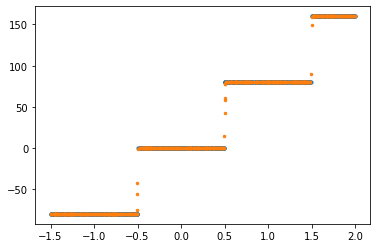

In [32]:
plt.scatter(x_test, y_test, s=10)
plt.scatter(x_test, y_pred_test, s=6)
plt.show()

Dla zbioru *steps large* i i architektury z jedną warstwą ukrytą z 10 neutronami:
 * MSE dla zbioru treningowego: 4.191
 * MSE dla zbioru testowego: 4.655
 
czyli tak samo jak dla poprzedniej architektury.

#### Architektura: dwie warstwy ukryte, po 5 neuronów każda

In [33]:
no_neutrons = [1, 5, 5, 1] #ile jest neutrownów w każdej z wartw, wliczając wejściową i wyjściową
w0 = np.array([[500, 500, 500, 500, 500]]) # rozmiar n_0 x n_1 czyli 1x5
b0 = np.array([[-250, -750, 250, 250, 250]]) # 1x5 bo 5 neuronów w pierwszej warstwie ukrytej
w1 = np.array([[1, 0, 0, 0, 0],
               [0, 1, 0, 0, 0],
               [0, 0, 1, 0, 0],
               [0, 0, 0, 1, 0],
               [0, 0, 0, 0, 1]]) # rozmiar n_1 x n_2-wyjściowej czyli 5x5
b1 = np.array([[0, 0, 0, 0, 0]]) # 1x5 bo 5 neuronów w drugiej warstwie ukrytej
w2 = np.array([[345], [345], [345], [-345], [345]]) # rozmiar n_1 x n_2-wyjściowej czyli 5x1
b2 = np.array([[-596]]) #1x1 bo tyle netronów 2 drugiej-ostatniej warstwie
weights = [w0, w1, w2]
bias = [b0, b1, b2]

In [34]:
y_pred_train = MLP(x, no_neutrons, weights, bias, sigmoid2)
mean_squared_error(y, y_pred_train)

5.550755875891116

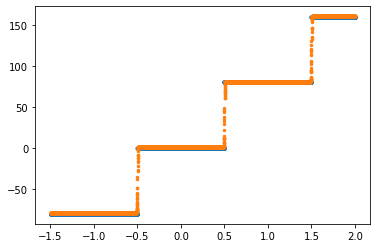

In [35]:
plt.scatter(x, y, s=10)
plt.scatter(x, y_pred_train, s=6)
plt.show()

In [36]:
y_pred_test = MLP(x_test, no_neutrons, weights, bias, sigmoid2)
mean_squared_error(y_test, y_pred_test)

6.059979340702833

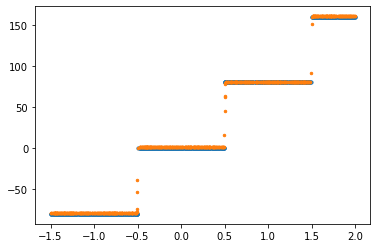

In [37]:
plt.scatter(x_test, y_test, s=10)
plt.scatter(x_test, y_pred_test, s=6)
plt.show()

Dla zbioru *steps large* i i architektury z dwiema warstwami ukrytymi, po 5 neutronów każda:
 * MSE dla zbioru treningowego: 5.551
 * MSE dla zbioru testowego: 6.060